In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
file_path_t = r"C:/Users/vehico/Documents/Thesis/Distance-project/OpenLayers/my-openlayers-project/public/data/aggregati_municipio_transit_ROMA.csv"
file_path_d = r"C:/Users/vehico/Documents/Thesis/Distance-project/OpenLayers/my-openlayers-project/public/data/aggregati_municipio.csv"

# Caricare i dati aggregati
df = pd.read_csv(file_path_d)  # Dati Driving
df_transit = pd.read_csv(file_path_t)  # Dati Transit

In [4]:
# Unire i due dataset per comune
df_merged = df.merge(df_transit, on="Comune", suffixes=("_driving", "_transit"))
df_merged.head(5)

,Comune,Popolazione_totale_driving,SI_mean_km_driving,SP_mean_km_driving,SS_mean_km_driving,IC_mean_km,SI_mean_min_driving,SP_mean_min_driving,SS_mean_min_driving,IC_mean_min,...,SS_mean_km_transit,SI_mean_min_transit,SP_mean_min_transit,SS_mean_min_transit,SI_St.Dv_km_transit,SP_St.Dv_km_transit,SS_St.Dv_km_transit,SI_St.Dv_min_transit,SP_St.Dv_min_transit,SS_St.Dv_min_transit
0,AFFILE,1325.0,0.292473,0.521448,0.521448,12.485212,0.765321,1.455887,1.455887,19.232252,...,0.469341,2.176352,6.297711,6.297711,1.373201,1.349867,1.349867,23.747003,23.346309,23.346309
1,AGOSTA,1588.0,2.366532,2.366532,2.344198,8.814869,5.197534,5.197534,5.173793,11.566856,...,1.342509,9.573699,9.573699,9.320634,1.584443,1.584443,1.581895,6.318805,6.318805,6.276593
2,ALBANO LAZIALE,38363.0,4.541615,4.507071,4.580387,4.477968,9.692404,9.651213,10.531883,10.189825,...,4.804401,30.808084,31.050686,29.161174,1.655885,1.947275,2.127600,12.702745,13.063238,14.216730
3,ALLUMIERE,3642.0,0.711591,0.947795,1.183155,4.420171,2.348407,3.264745,3.319756,8.279077,...,0.822647,9.501030,12.766859,9.369591,1.668772,1.775545,2.291026,5.008673,5.703995,14.224631
4,ANGUILLARA SABAZIA,17530.0,3.411358,3.347205,3.253728,3.253728,6.789436,6.369140,5.827227,5.827227,...,4.160093,39.312786,38.937659,38.871929,11.059407,10.983421,11.292034,39.483445,39.396978,45.094651


In [5]:
# Creare nuove colonne con la differenza tra transit e driving per ogni categoria scolastica
for category in ["SI", "SP", "SS"]:
    df_merged[f"{category}_diff_km"] = df_merged[f"{category}_mean_km_transit"] - df_merged[f"{category}_mean_km_driving"]
    df_merged[f"{category}_diff_min"] = df_merged[f"{category}_mean_min_transit"] - df_merged[f"{category}_mean_min_driving"]
    
df_merged.head(5)

,Comune,Popolazione_totale_driving,SI_mean_km_driving,SP_mean_km_driving,SS_mean_km_driving,IC_mean_km,SI_mean_min_driving,SP_mean_min_driving,SS_mean_min_driving,IC_mean_min,...,SS_St.Dv_km_transit,SI_St.Dv_min_transit,SP_St.Dv_min_transit,SS_St.Dv_min_transit,SI_diff_km,SI_diff_min,SP_diff_km,SP_diff_min,SS_diff_km,SS_diff_min
0,AFFILE,1325.0,0.292473,0.521448,0.521448,12.485212,0.765321,1.455887,1.455887,19.232252,...,1.349867,23.747003,23.346309,23.346309,-0.132435,1.411031,-0.052106,4.841824,-0.052106,4.841824
1,AGOSTA,1588.0,2.366532,2.366532,2.344198,8.814869,5.197534,5.197534,5.173793,11.566856,...,1.581895,6.318805,6.318805,6.276593,-1.004839,4.376165,-1.004839,4.376165,-1.001688,4.146841
2,ALBANO LAZIALE,38363.0,4.541615,4.507071,4.580387,4.477968,9.692404,9.651213,10.531883,10.189825,...,2.127600,12.702745,13.063238,14.216730,0.599343,21.115680,0.638325,21.399472,0.224014,18.629291
3,ALLUMIERE,3642.0,0.711591,0.947795,1.183155,4.420171,2.348407,3.264745,3.319756,8.279077,...,2.291026,5.008673,5.703995,14.224631,0.198400,7.152622,0.140982,9.502114,-0.360507,6.049835
4,ANGUILLARA SABAZIA,17530.0,3.411358,3.347205,3.253728,3.253728,6.789436,6.369140,5.827227,5.827227,...,11.292034,39.483445,39.396978,45.094651,0.752832,32.523349,0.803037,32.568518,0.906364,33.044702


In [ ]:
# Salvare il dataset con le differenze
df_merged.to_csv("differenze_municipio.csv", index=False)

In [7]:
# Calcolare statistiche per le differenze
stats = df_merged[
    ["SI_diff_min", "SP_diff_min", "SS_diff_min"]
].describe().T

stats

,count,mean,std,min,25%,50%,75%,max
SI_diff_min,107.0,24.157046,36.752997,0.316667,5.369199,10.786824,26.105411,194.283333
SP_diff_min,108.0,20.586655,30.731412,-2.683333,4.801977,10.211030,26.306396,194.283333
SS_diff_min,108.0,25.949494,34.106782,-0.500000,6.062459,13.272359,32.129850,194.283333


In [8]:
# Aggiungere l'Intervallo Interquartile (IQR)
stats["IQR"] = stats["75%"] - stats["25%"]

stats

,count,mean,std,min,25%,50%,75%,max,IQR
SI_diff_min,107.0,24.157046,36.752997,0.316667,5.369199,10.786824,26.105411,194.283333,20.736212
SP_diff_min,108.0,20.586655,30.731412,-2.683333,4.801977,10.211030,26.306396,194.283333,21.504419
SS_diff_min,108.0,25.949494,34.106782,-0.500000,6.062459,13.272359,32.129850,194.283333,26.067391


📌 Analisi Generale

    - Il numero di osservazioni (count) è simile per tutte le categorie, attorno a 365-366 comuni.

    - La media delle differenze è sempre positiva, il che indica che in media il trasporto pubblico richiede più tempo rispetto alla guida.

    - La deviazione standard (std) è piuttosto elevata, suggerendo una grande variabilità nei tempi di viaggio tra i comuni.

    - I valori minimi sono leggermente negativi, il che significa che in pochi casi il trasporto pubblico è più veloce della guida.

    - L'intervallo interquartile (IQR) (differenza tra il 75° percentile e il 25° percentile) indica una dispersione significativa nei dati.

    - I valori massimi mostrano delle differenze molto elevate, con alcune zone che hanno tempi di trasporto pubblico fino a 796 minuti più lunghi rispetto alla guida.

🔍 Analisi per Categoria Scolastica

    - Le scuole secondarie hanno la maggiore differenza nei tempi di viaggio (media 30.7 min, massimi fino a 763 min), suggerendo che sono più distanti o meno servite dai mezzi pubblici.

    - La variazione più grande si trova nelle scuole primarie (deviazione standard 50.0 min e massimo 796.4 min), indicando che alcuni comuni hanno un trasporto pubblico molto più lento rispetto alla guida per queste scuole.

    - Alcuni comuni hanno una differenza negativa, seppur minima, il che significa che il trasporto pubblico può essere leggermente più veloce in certi casi, forse per scuole più centrali e ben collegate.

    - L’ampio IQR suggerisce una grande disparità tra i comuni: ci sono zone dove la differenza è modesta, mentre in altre è estremamente elevata.

📊 Conclusioni

    - Il trasporto pubblico è generalmente più lento rispetto alla guida per raggiungere le scuole, ma con forti variazioni tra comuni.

    - Le scuole secondarie sono le più penalizzate, suggerendo una minor copertura dei trasporti pubblici per gli studenti più grandi.

    - Alcune zone hanno differenze enormi (oltre 700 minuti), probabilmente per collegamenti inefficienti o tragitti lunghi.

    - Un’analisi geografica su una mappa con OpenLayers potrebbe aiutare a individuare le zone più problematiche per il trasporto pubblico.

In [9]:
# Consideriamo le colonne relative alla differenza di tempo (minuti) tra transit e driving
diff_columns = ["SI_diff_min", "SP_diff_min", "SS_diff_min"]

# Calcolare la deviazione standard per ogni comune
df_merged["std_diff"] = df_merged[diff_columns].std(axis=1)

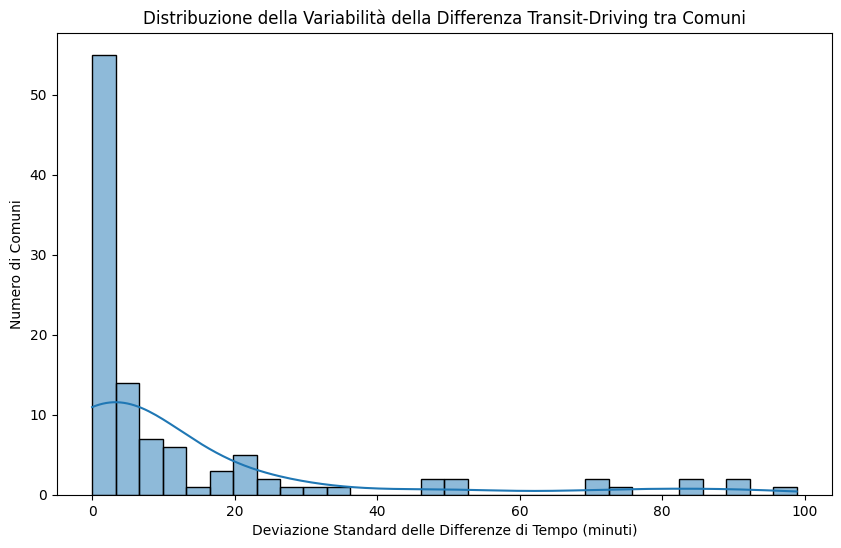

In [10]:
# Istogramma della deviazione standard tra i comuni
plt.figure(figsize=(10, 6))
sns.histplot(df_merged["std_diff"], bins=30, kde=True)
plt.xlabel("Deviazione Standard delle Differenze di Tempo (minuti)")
plt.ylabel("Numero di Comuni")
plt.title("Distribuzione della Variabilità della Differenza Transit-Driving tra Comuni")
plt.show()

Interpretazione:

    - Nella maggior parte dei comuni, la differenza tra trasporto pubblico e guida è abbastanza costante e prevedibile.

    - Tuttavia, alcuni comuni hanno una variabilità elevata, probabilmente a causa di fattori come la disponibilità del trasporto pubblico, orari variabili, presenza di più opzioni di viaggio o infrastrutture inadeguate.

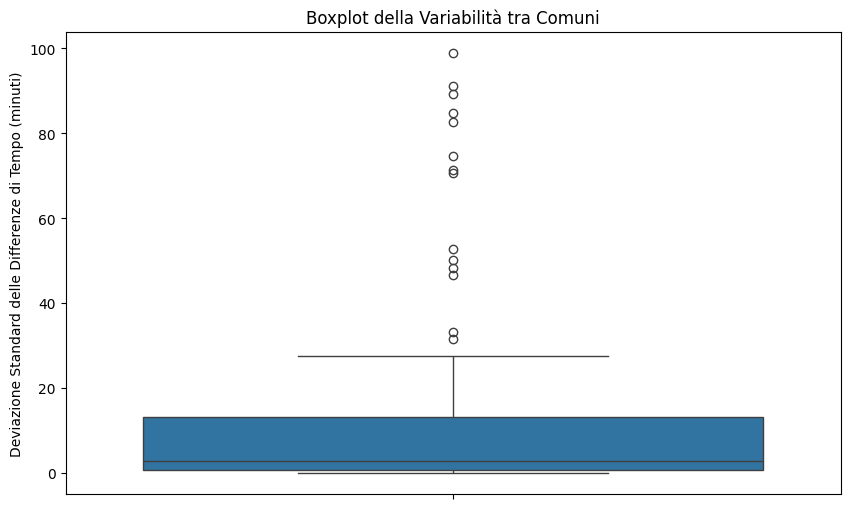

In [11]:
# Boxplot per individuare outlier
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_merged["std_diff"])
plt.ylabel("Deviazione Standard delle Differenze di Tempo (minuti)")
plt.title("Boxplot della Variabilità tra Comuni")
plt.show()

In [12]:
# Identificare i comuni con maggiore variazione
top_var_comuni = df_merged.nlargest(10, "std_diff")[["Comune", "std_diff"]]
top_var_comuni

,Comune,std_diff
79,ROCCA CANTERANO,98.892927
90,SAN GREGORIO DA SASSOLA,91.077005
46,JENNE,89.239107
17,CAPRANICA PRENESTINA,84.739149
75,PONZANO ROMANO,82.772784
50,LICENZA,74.697574
106,VIVARO ROMANO,71.430911
103,VALLINFREDA,70.786180
26,CERVARA DI ROMA,52.673259
12,CAMERATA NUOVA,50.085136


In [13]:
# Calcolare i quartili e i limiti per identificare gli outlier
Q1 = df_merged["std_diff"].quantile(0.25)
Q3 = df_merged["std_diff"].quantile(0.75)
IQR = Q3 - Q1


In [14]:
# Definire i limiti per gli outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
# Identificare gli outlier
outliers = df_merged[(df_merged["std_diff"] < lower_bound) | 
                          (df_merged["std_diff"] > upper_bound)]
print(f"Numero di outlier: {outliers.shape[0]}")

Numero di outlier: 14


In [16]:
# Calcolare la percentuale di outlier
percentuale_outlier = (len(outliers) / len(df_merged)) * 100
print(f"Percentuale di outlier: {percentuale_outlier:.2f}%")

Percentuale di outlier: 12.96%


In [17]:
print("Comuni outlier:")
print(outliers[["Comune", "std_diff"]])

Comuni outlier:
                      Comune   std_diff
5           ANTICOLI CORRADO  31.686907
12            CAMERATA NUOVA  50.085136
17      CAPRANICA PRENESTINA  84.739149
25           CERRETO LAZIALE  33.153471
26           CERVARA DI ROMA  52.673259
44                     GORGA  46.763622
46                     JENNE  89.239107
50                   LICENZA  74.697574
75            PONZANO ROMANO  82.772784
79           ROCCA CANTERANO  98.892927
88                   SAMBUCI  48.256210
90   SAN GREGORIO DA SASSOLA  91.077005
103              VALLINFREDA  70.786180
106            VIVARO ROMANO  71.430911


In [18]:
# Esportare in un CSV
outliers.to_csv("outliers_comuni.csv", index=False)
print("Outliers salvati in 'outliers_comuni.csv'")

Outliers salvati in 'outliers_comuni.csv'
